This code is for seeking various soil, whose soil organic carbon (SOC) is diverse, in restricted location. <br/>

- Dataset <br/>
(1) 211024_BarePoints.csv : for making a cluster model according to SOC <br/>
(2) Sample_A.csv : (preliminary experiment data) for testing the cluster model <br/>

- Process <br/>
(1) Dimension-reduction : PCA <br/>
(2) K-means Clustering

### Upload Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_origin = pd.read_csv("./211024_BarePoints.csv")
X = X_origin.iloc[:,4:]  # remove the first four columns 
X

B03_Green_  B02_Blue_4  B12_SWIR_2  B11_SWIR_1  B8A_VRE_86  B07_VRE_78  \
0           2244        1652        3327        4459        3394        3355   
1           2292        1725        3459        4568        3618        3561   
2           1267         881        1992        2824        2241        2309   
3           2559        1914        3683        4856        3802        3770   
4           1881        1286        2879        3922        3097        2923   
...          ...         ...         ...         ...         ...         ...   
1697        1338         852        2962        4020        2677        2647   
1698        2267        1592        3851        5107        3745        3711   
1699        1541         970        3050        4185        3071        3034   
1700        2151        1475        3647        4886        3530        3520   
1701        1172         723        2359        3439        2454        2346   

      B06_VRE_74  B05_VRE_75  B04_Red_66  
0           3230        3124        2866  
1           3465        3322        2938  
2           1983        1833        1752  
3           3681        3560        3222  
4           2876        2683        2573  
...          ...         ...         ...  
1697        2518        2363        2059  
1698        3507        3380        3087  
1699        2825        2651        2341  
1700        3406        3291        2952  
1701        2266        2113        1908  

[1702 rows x 9 columns]

### (Optional) Dimension Reduction: Try (1)PCA (2)k-sne

### 7-D PCA & 5-Means Clustering

(1) origin data : fit_transform() 7-D PCA <br/>
(2) origin data :  5-means clustering <br/>
(3) Upload new data <br/>
(4) new data : (only) transform() 7-D PCA <br/>
(5) new data : 5-means clustering <br/>
(6) concat(origin data, new data) <br/>
(7) concat data : k-sne <br/>

In [5]:
# n-dimension PCA
pca = PCA(n_components=0.999)
X_pca = pca.fit_transform(X)
print(pca.n_components_)
pca.components_.T

7


array([[-0.27189013, -0.14798679,  0.49122225, -0.29546553, -0.00403193,
         0.15257205,  0.12152519],
       [-0.18898447, -0.06734522,  0.55244598, -0.44746972,  0.23660997,
         0.02056875, -0.05402078],
       [-0.29893117,  0.66407406,  0.36260916,  0.55508471,  0.17087063,
        -0.01515716,  0.02447029],
       [-0.40978168,  0.55422448, -0.40712084, -0.53795566, -0.24949538,
         0.08513942, -0.01546209],
       [-0.33995493, -0.13485332, -0.28440931, -0.04825248,  0.68091545,
        -0.46594249, -0.25589302],
       [-0.36428679, -0.22723853, -0.2081161 ,  0.14059997,  0.15691594,
         0.15942617,  0.64554451],
       [-0.36641155, -0.24477099, -0.12838214,  0.19212154, -0.00866298,
         0.46464787,  0.06468799],
       [-0.37062556, -0.24455949, -0.00526874,  0.21088099, -0.25220047,
         0.22307882, -0.68267291],
       [-0.3364295 , -0.18936855,  0.12474235,  0.10713318, -0.54827563,
        -0.67870415,  0.17041043]])

In [9]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
X_kmeans = kmeans.fit_transform(X_pca)
y_pred = kmeans.fit_predict(X_pca)
X_kmeans, y_pred

(array([[1753.30336774,  632.92108401, 3270.43302987, 5117.72872051,
          738.63187989],
        [2186.60543754, 1009.05735155, 3712.17784723, 5560.78227632,
          428.99997952],
        [1983.00967963, 3137.41877309,  793.16022227, 1630.36825089,
         4241.07879395],
        ...,
        [ 522.26706616,  805.29056016, 2019.3153541 , 3885.40469272,
         1897.05228037],
        [2174.27330434,  977.631253  , 3714.33843904, 5589.01925024,
          217.5640982 ],
        [1248.65608888, 2439.88287761,  502.7001697 , 2220.98360648,
         3556.16824364]]),
 array([1, 4, 2, ..., 0, 4, 2]))

Visualize by k-sne

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


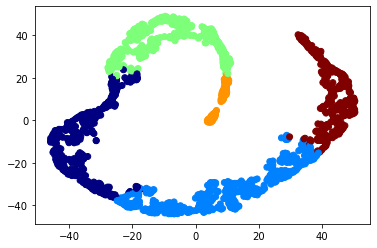

In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_kmeans)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred, cmap="jet")

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\uyoung\AppData\Local\Temp\ipykernel_33696\2018050355.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


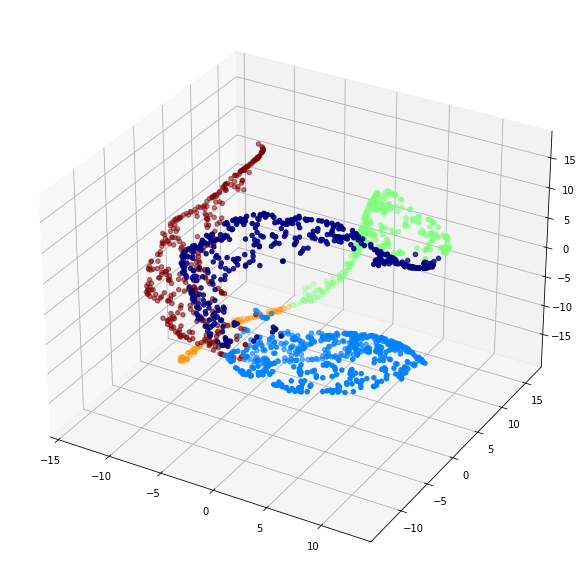

In [13]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_kmeans)

fig = plt.figure()
ax = fig.gca(projection='3d')

fig.set_size_inches(18.5,10.5)
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=y_pred, cmap="jet")

Visualize by plotly express

In [ ]:
fig = px.scatter_3d(df,
                    x='centroid_1',
                    y='',
                    z='PC_3',
                    # size= np.ones(shape=(len(df),))*2,
                    color='centroid',
                    opacity=0.7,
                    width=1000,
                    height=800
                    
)
fig.update_layout(margin=dict(l=0, r=0,b=0,t=0))
fig.update_traces(marker_size=3)
fig.show()

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
fig.set_size_inches(40,30)
ax = fig.gca(projection='3d')

cdict = {0:'black', 1:'red', 2:'blue', 3:'green', 4:'yellow'}

for g in np.unique(y_ALL):
    ix = np.where(y_ALL ==g)
    ax.scatter(X_ALL[ix,0], X_ALL[ix,1], X_ALL[ix,2], c=cdict[g], label='cluster'+str(g),s=200, marker='X')

ax.view_init(30,60)   #각 변경
plt.legend()
plt.show()


upload test data

In [106]:
New = pd.read_csv("./211024_sample_A.csv")
New = New.iloc[:,1:]  # remove the first three columns

test_X = New.iloc[:,2:-1]  # new data
test_y = New.iloc[:,-1]    # y_label
test_X

B03_Green_  B02_Blue_4  B12_SWIR_2  B11_SWIR_1  B8A_VRE_86  B07_VRE_78  \
0        1579        1066        3531        4336        3154        2892   
1        2017        1370        3735        4971        3240        3634   
2        1962        1308        3649        4834        3329        3256   
3        1808        1175        3622        4861        3562        3420   
4        1892        1344        3653        5054        3300        3165   
5        1919        1254        3546        4703        3205        3260   
6        2138        1367        3967        5249        3640        3686   

   B06_VRE_74  B05_VRE_75  B04_Red_66  
0        3080        2617        2128  
1        3326        3465        2868  
2        3166        3034        2748  
3        3172        3025        2606  
4        3041        2842        2541  
5        3045        2813        2631  
6        3481        3306        2944

(1) PCA

In [107]:
test_X_pca = pca.transform(test_X)  # Apply dimensionality reduction to the new data
pca.components_.T

array([[-0.27189013, -0.14798679,  0.49122225, -0.29546553, -0.00403193,
         0.15257205,  0.12152519],
       [-0.18898447, -0.06734522,  0.55244598, -0.44746972,  0.23660997,
         0.02056875, -0.05402078],
       [-0.29893117,  0.66407406,  0.36260916,  0.55508471,  0.17087063,
        -0.01515716,  0.02447029],
       [-0.40978168,  0.55422448, -0.40712084, -0.53795566, -0.24949538,
         0.08513942, -0.01546209],
       [-0.33995493, -0.13485332, -0.28440931, -0.04825248,  0.68091545,
        -0.46594249, -0.25589302],
       [-0.36428679, -0.22723853, -0.2081161 ,  0.14059997,  0.15691594,
         0.15942617,  0.64554451],
       [-0.36641155, -0.24477099, -0.12838214,  0.19212154, -0.00866298,
         0.46464787,  0.06468799],
       [-0.37062556, -0.24455949, -0.00526874,  0.21088099, -0.25220047,
         0.22307882, -0.68267291],
       [-0.3364295 , -0.18936855,  0.12474235,  0.10713318, -0.54827563,
        -0.67870415,  0.17041043]])

In [108]:
test_X_pca

array([[-3.81323220e+02,  4.08880196e+02, -1.06042831e+02,
         2.83624004e+02,  1.96045257e+02,  1.93949950e+02,
        -6.01569478e+01],
       [-1.83197817e+03,  2.23051485e+02, -3.01152718e+01,
         1.95357746e+02, -3.04093963e+02,  1.97457185e+02,
        -8.08014980e+00],
       [-1.35727758e+03,  3.43513980e+02, -5.59463607e+00,
         7.33877166e+01, -1.21891225e+02, -1.33482309e+01,
        -1.47584984e+01],
       [-1.38330691e+03,  3.31229723e+02, -2.94335588e+02,
         1.44748246e+02,  1.00371165e+02, -2.21345039e+01,
         1.21334016e+00],
       [-1.20678516e+03,  6.17374847e+02, -8.97841536e+01,
        -1.36244698e+02, -3.83240108e+01,  3.39664370e+01,
         7.87479956e+00],
       [-1.04460627e+03,  3.34144932e+02, -4.02712401e+00,
         4.77142844e+01, -8.22836477e+01,  1.68852909e+00,
         1.39856492e+02],
       [-2.22593911e+03,  4.34282425e+02, -1.35555832e+02,
         1.32577895e+02, -5.73954137e+01,  4.28915329e+01,
         7.0899037

In [109]:
np.sqrt(pca.explained_variance_)

array([1655.2888322 ,  378.46362458,  178.32751454,  123.04365418,
        111.9833169 ,   46.67025544,   37.15487974])

(2) k-means clustering

In [110]:
test_y_pred = kmeans.predict(test_X_pca)
test_y_pred

array([1, 4, 1, 1, 1, 1, 4])

(3) Visualize

In [111]:
# combine the new data with the original data
X_ALL = np.concatenate((X_pca, test_X_pca), axis=0)
y_ALL = np.concatenate((y_pred, test_y_pred), axis=0)

In [112]:
y_pred.shape, test_y_pred.shape, y_ALL.shape

((1702,), (7,), (1709,))

In [113]:
y_ALL[:10]

array([1, 4, 2, 4, 0, 4, 4, 1, 4, 1])

In [22]:
y_ALL[0]

1

In [114]:
df = pd.DataFrame(X_ALL)
df['name'] = [str(i) for i in range(len(df))]
df

0           1           2           3           4           5  \
0    -1403.704078 -234.334344  325.820479  -86.167281  -31.248792  -35.069544   
1    -1849.582271 -294.882442  264.404774   -5.609275   74.592533   14.000716   
2     2159.893043 -605.434337  175.064699  -36.580642  -31.980201  -59.821401   
3    -2544.460109 -275.916141  374.561804  -57.041913   25.134319  -11.958731   
4     -231.797807 -362.887391  187.083562  -13.742906  -54.043180 -131.400798   
...           ...         ...         ...         ...         ...         ...   
1704 -1357.277583  343.513980   -5.594636   73.387717 -121.891225  -13.348231   
1705 -1383.306913  331.229723 -294.335588  144.748246  100.371165  -22.134504   
1706 -1206.785159  617.374847  -89.784154 -136.244698  -38.324011   33.966437   
1707 -1044.606273  334.144932   -4.027124   47.714284  -82.283648    1.688529   
1708 -2225.939112  434.282425 -135.555832  132.577895  -57.395414   42.891533   

               6  name  
0       8.931066     0  
1     -19.670404     1  
2     155.096321     2  
3      -8.677338     3  
4       7.283422     4  
...          ...   ...  
1704  -14.758498  1704  
1705    1.213340  1705  
1706    7.874800  1706  
1707  139.856492  1707  
1708   70.899037  1708  

[1709 rows x 8 columns]

C:\Users\uyoung\AppData\Local\Temp\ipykernel_33940\2886023463.py:4: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



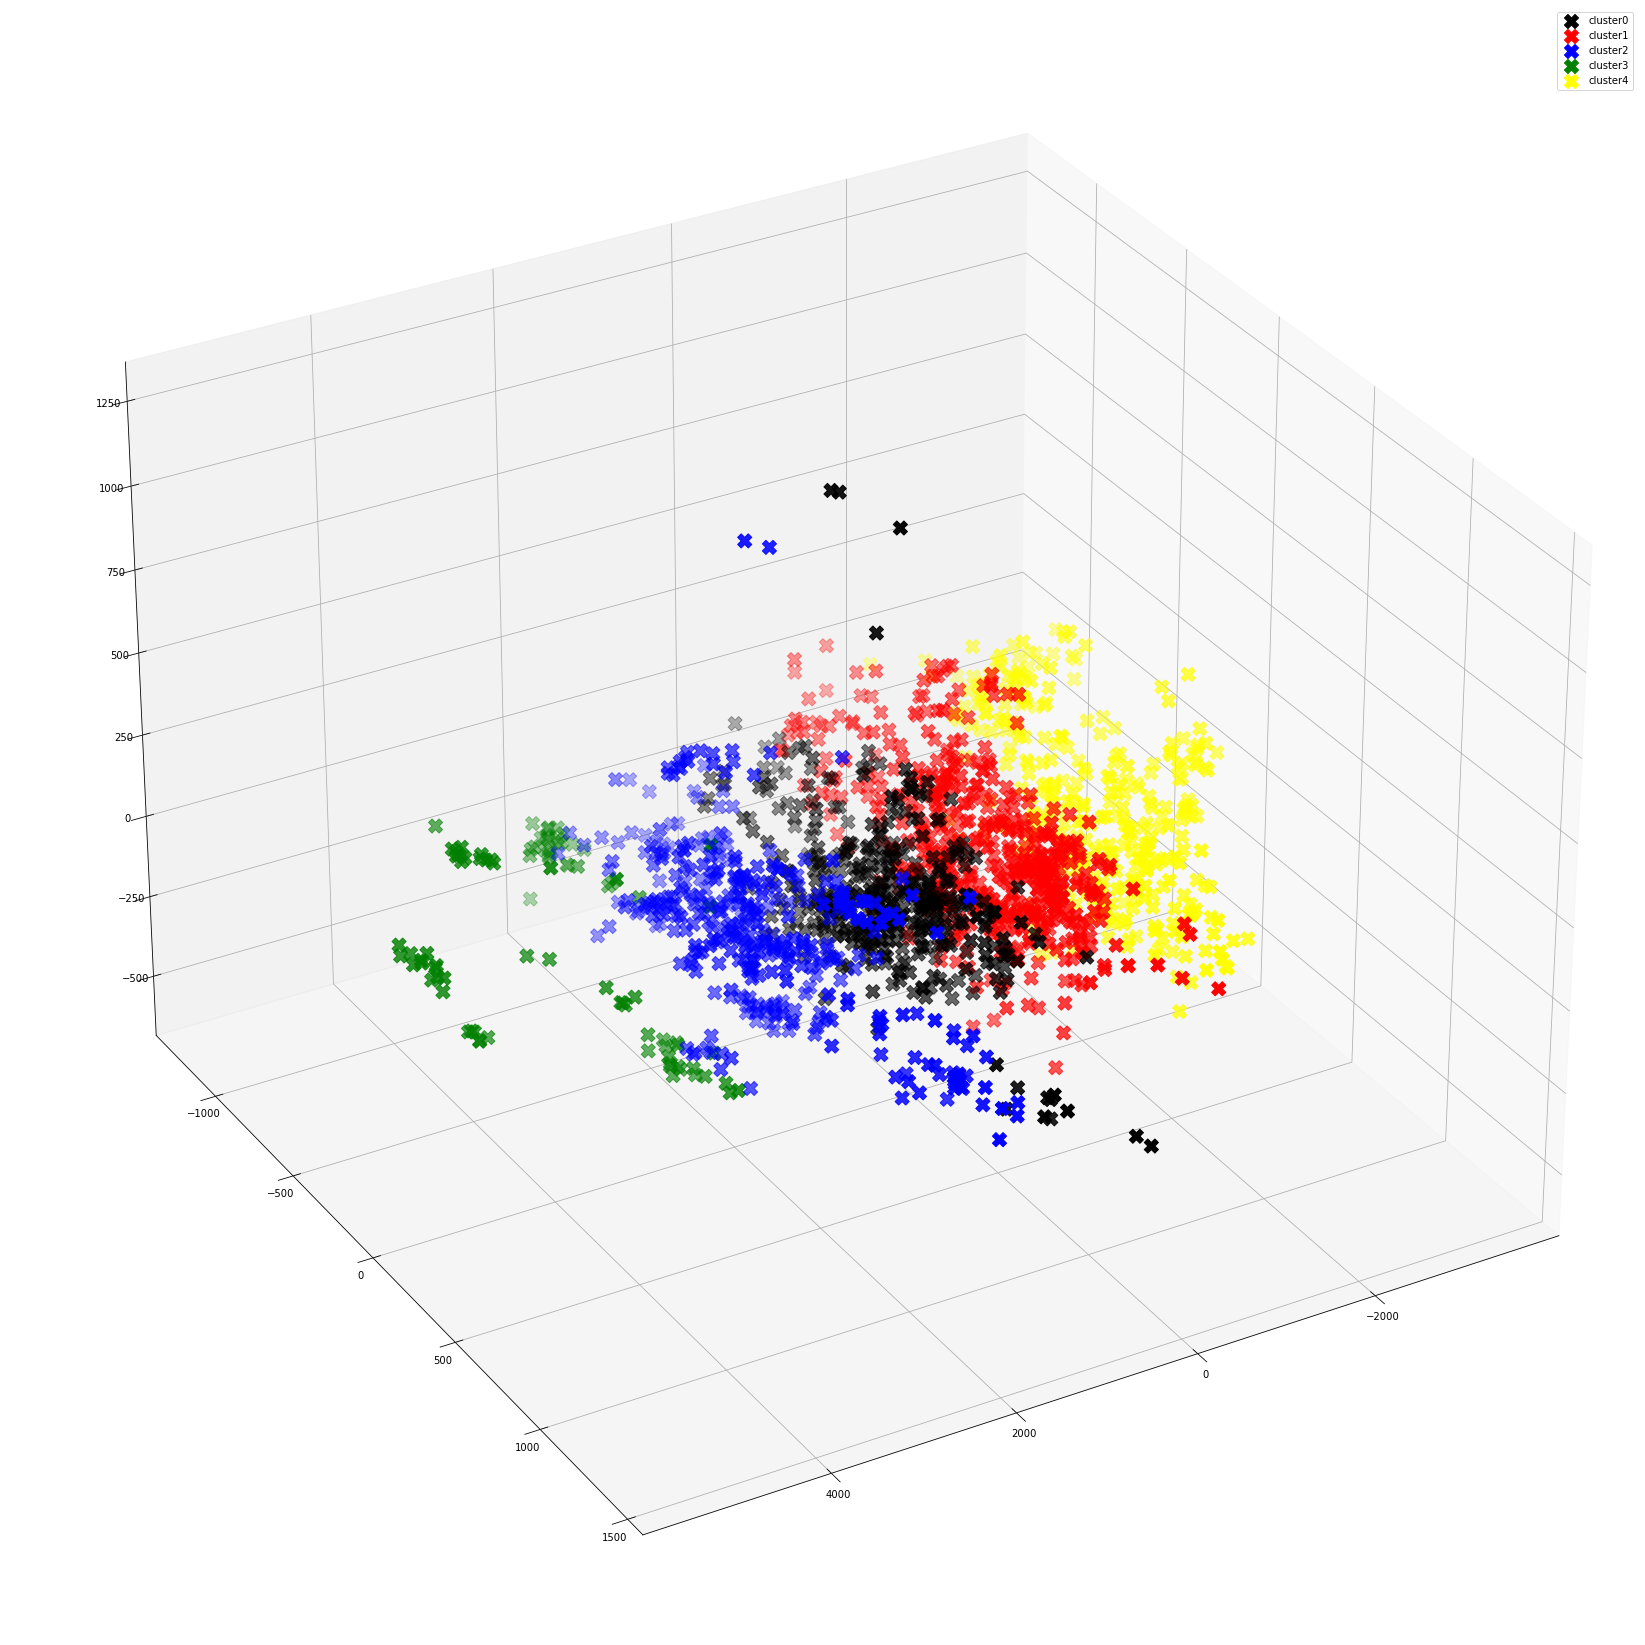

In [115]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
fig.set_size_inches(40,30)
ax = fig.gca(projection='3d')

cdict = {0:'black', 1:'red', 2:'blue', 3:'green', 4:'yellow'}

for g in np.unique(y_ALL):
    ix = np.where(y_ALL ==g)
    ax.scatter(X_ALL[ix,0], X_ALL[ix,1], X_ALL[ix,2], c=cdict[g], label='cluster'+str(g),s=200, marker='X')

ax.view_init(30,60)   #각 변경
plt.legend()
plt.show()


C:\Users\uyoung\AppData\Local\Temp\ipykernel_33940\1198875297.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


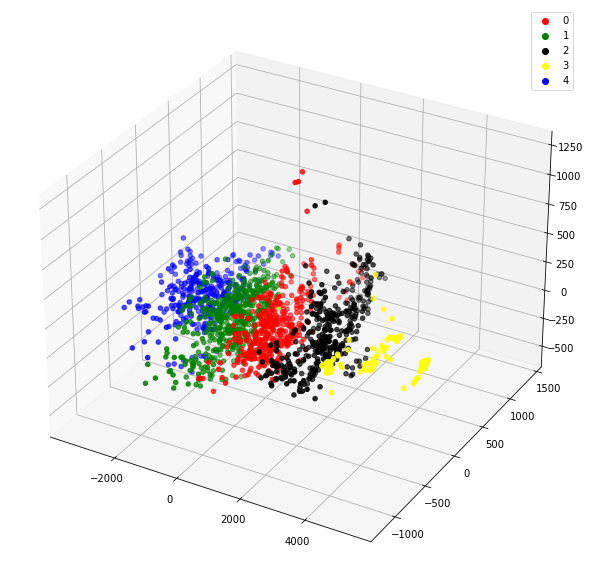

In [19]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
ax = fig.gca(projection='3d')

colors = ListedColormap(['red', 'green', 'black', 'yellow', 'blue'])
classes = [0,1,2,3,4]


fig.set_size_inches(18.5,10.5)
scatter = ax.scatter(X_ALL[:,0], X_ALL[:,1], X_ALL[:,2], c=y_ALL, cmap= colors)

# legend1 = ax.legend(*scatter.legend_elements(),
#                      loc="lower left", title="Clusters")
# ax.add_artist(legend1)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.show()

In [54]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install chart_studio

  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=1956bb8e347176b89befe5128b0356a8b3c43b8dc574cd6586ff225e90975a87
  Stored in directory: c:\users\uyoung\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [64]:
import plotly.express as px

In [65]:
import plotly.express as px
df = pd.DataFrame(X_ALL, columns=('PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7'))
df['centroid'] = y_ALL
df

PC_1        PC_2        PC_3        PC_4        PC_5        PC_6  \
0    -1403.704078 -234.334344  325.820479  -86.167281  -31.248792  -35.069544   
1    -1849.582271 -294.882442  264.404774   -5.609275   74.592533   14.000716   
2     2159.893043 -605.434337  175.064699  -36.580642  -31.980201  -59.821401   
3    -2544.460109 -275.916141  374.561804  -57.041913   25.134319  -11.958731   
4     -231.797807 -362.887391  187.083562  -13.742906  -54.043180 -131.400798   
...           ...         ...         ...         ...         ...         ...   
1704 -1357.277583  343.513980   -5.594636   73.387717 -121.891225  -13.348231   
1705 -1383.306913  331.229723 -294.335588  144.748246  100.371165  -22.134504   
1706 -1206.785159  617.374847  -89.784154 -136.244698  -38.324011   33.966437   
1707 -1044.606273  334.144932   -4.027124   47.714284  -82.283648    1.688529   
1708 -2225.939112  434.282425 -135.555832  132.577895  -57.395414   42.891533   

            PC_7  centroid  
0       8.931066         1  
1     -19.670404         4  
2     155.096321         2  
3      -8.677338         4  
4       7.283422         0  
...          ...       ...  
1704  -14.758498         1  
1705    1.213340         4  
1706    7.874800         1  
1707  139.856492         1  
1708   70.899037         0  

[1709 rows x 8 columns]

In [82]:
arr_=np.ones(shape=(len(df),))*2
arr_.shape


(1709,)

In [94]:
fig = px.scatter_3d(df,
                    x='PC_1',
                    y='PC_2',
                    z='PC_3',
                    # size= np.ones(shape=(len(df),))*2,
                    color='centroid',
                    opacity=0.7,
                    width=1000,
                    height=800
                    
)
fig.update_layout(margin=dict(l=0, r=0,b=0,t=0))
fig.update_traces(marker_size=3)
fig.show()

In [ ]:
fig = go.Scatter_3d(df,
                    x='PC_1',
                    y='PC_2',
                    z='PC_3',
                    mode='markers',
                    marker=dict(
                        size=1,
                        color='centroid',
                        opacity=0.7    
                    )
                    # symbol='species',
                    )
fig.show()

C:\Users\uyoung\AppData\Local\Temp\ipykernel_33940\4009074726.py:4: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



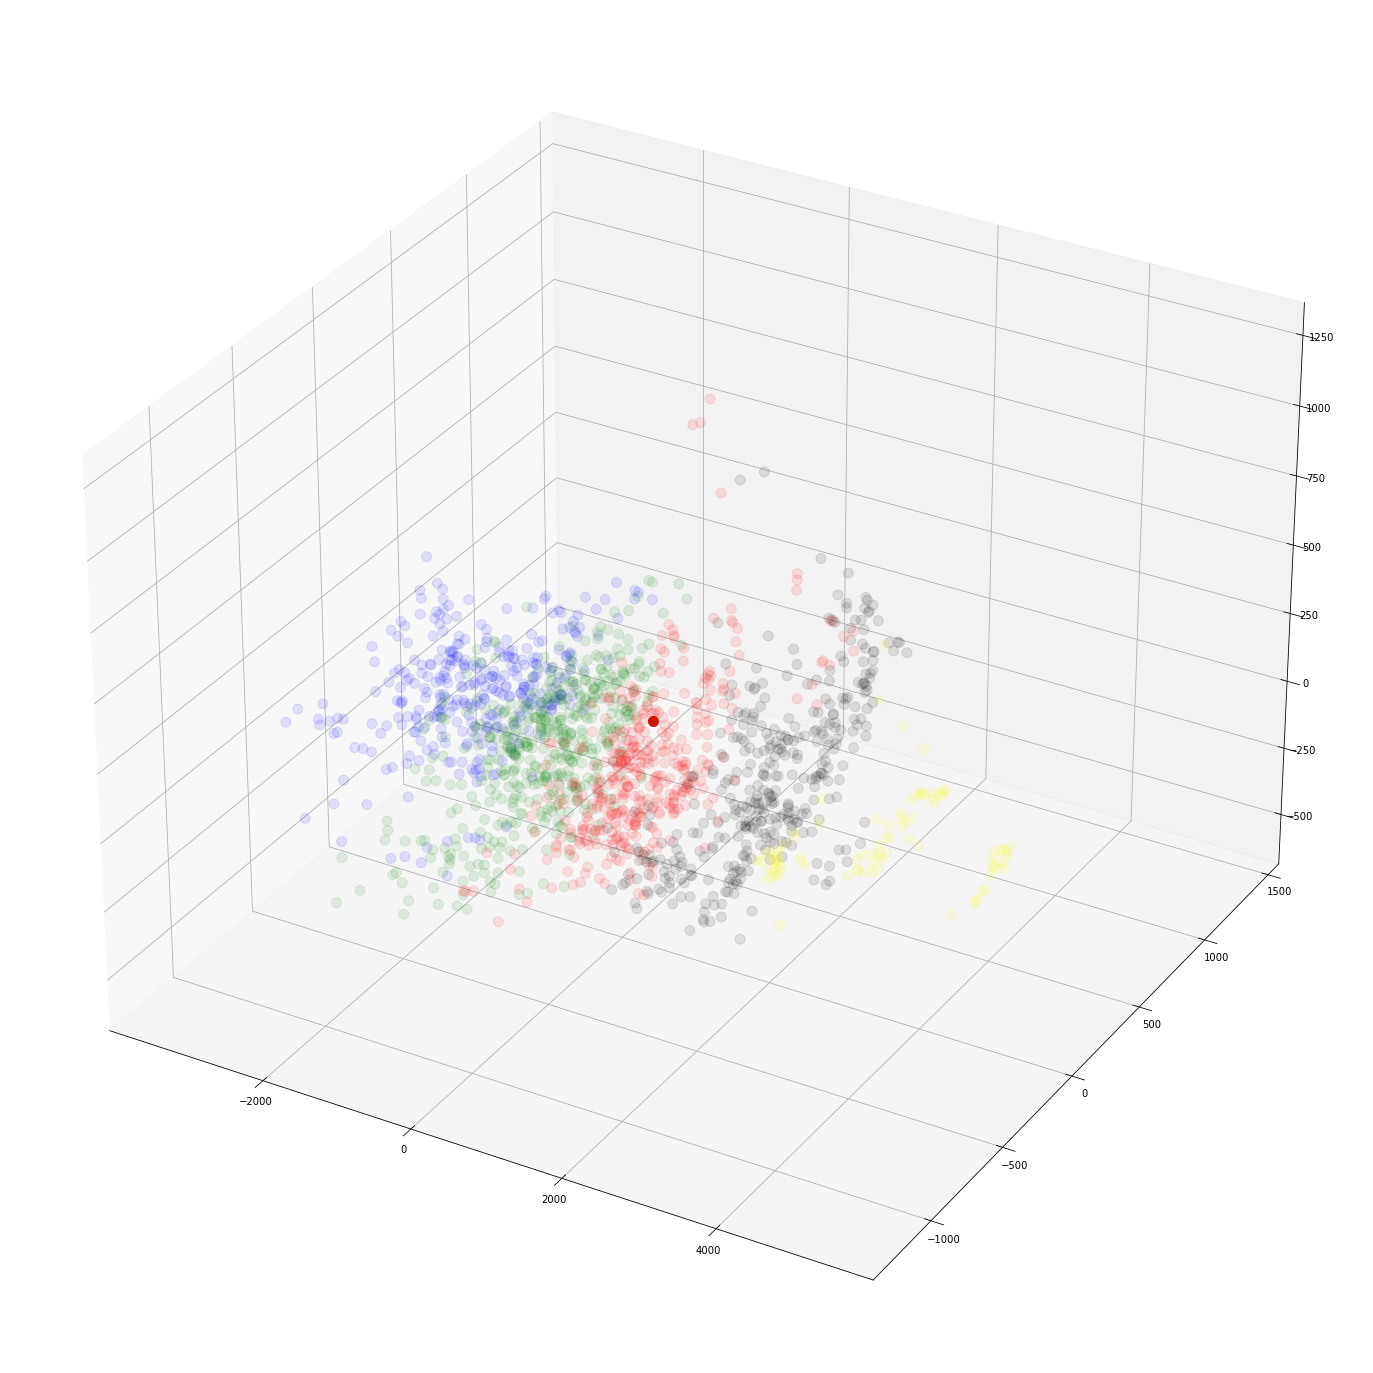

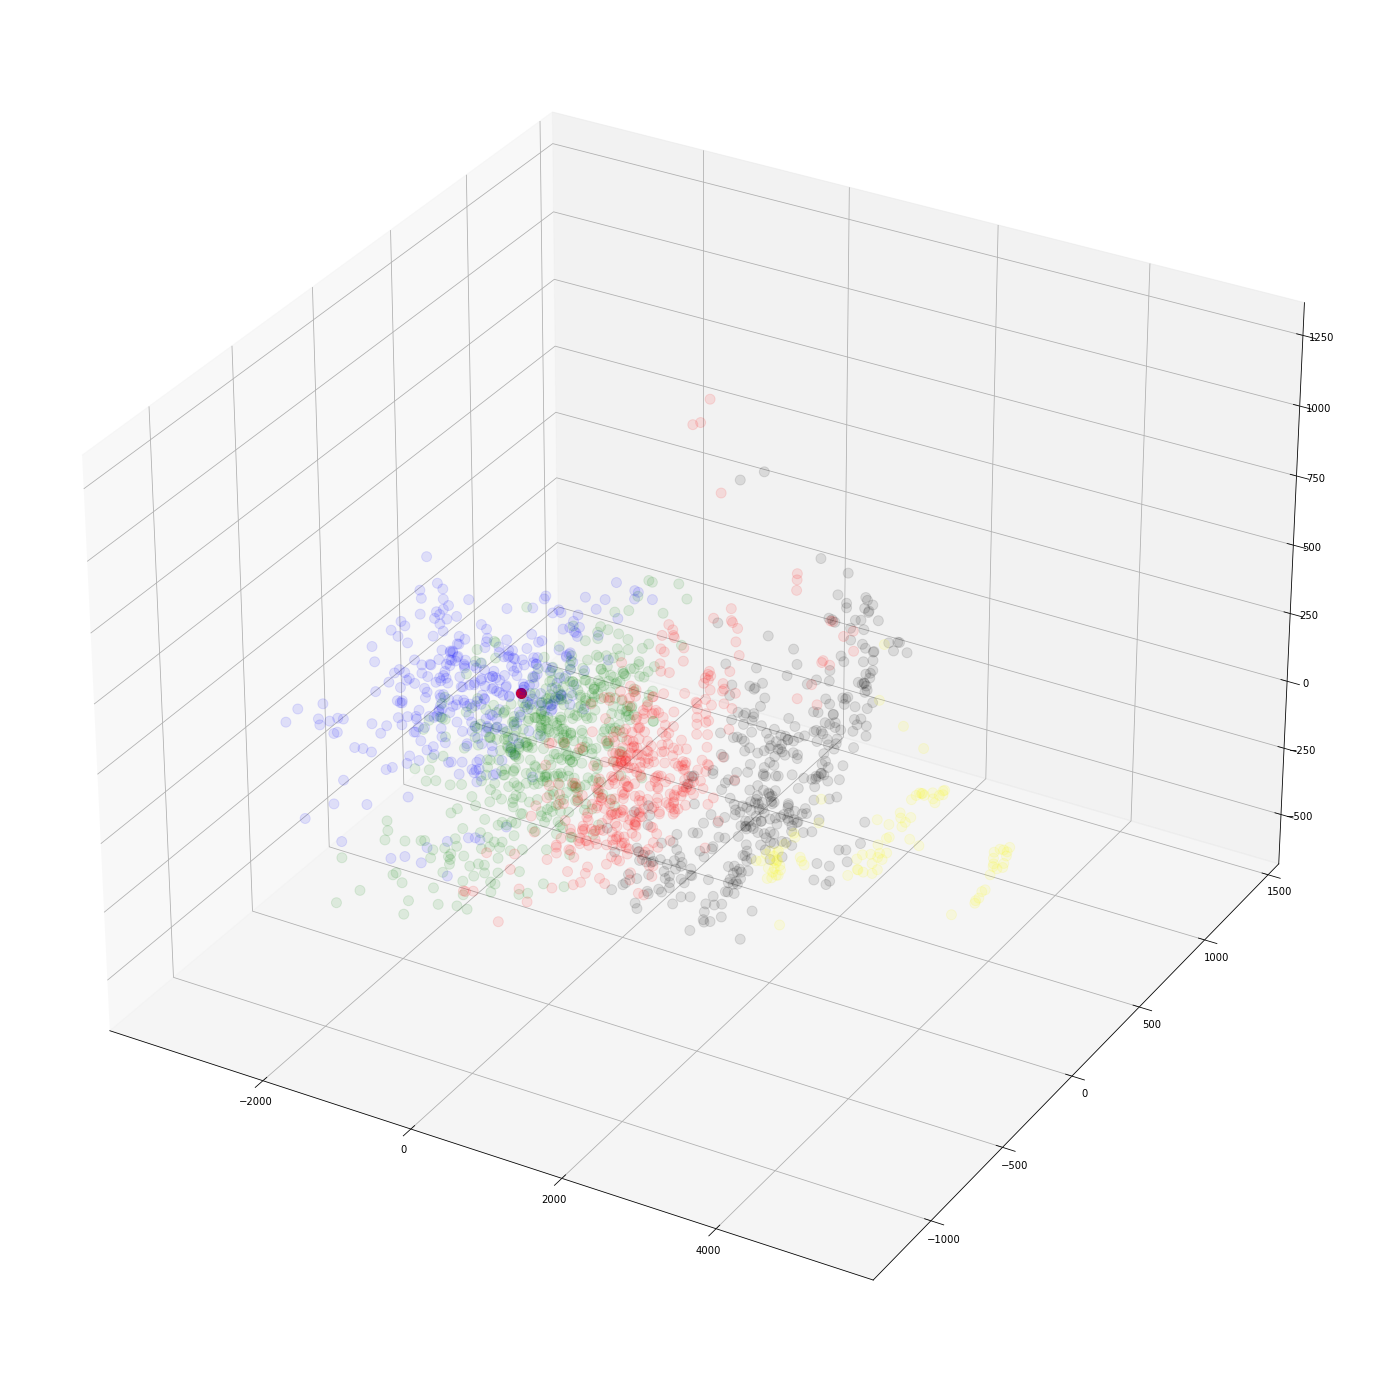

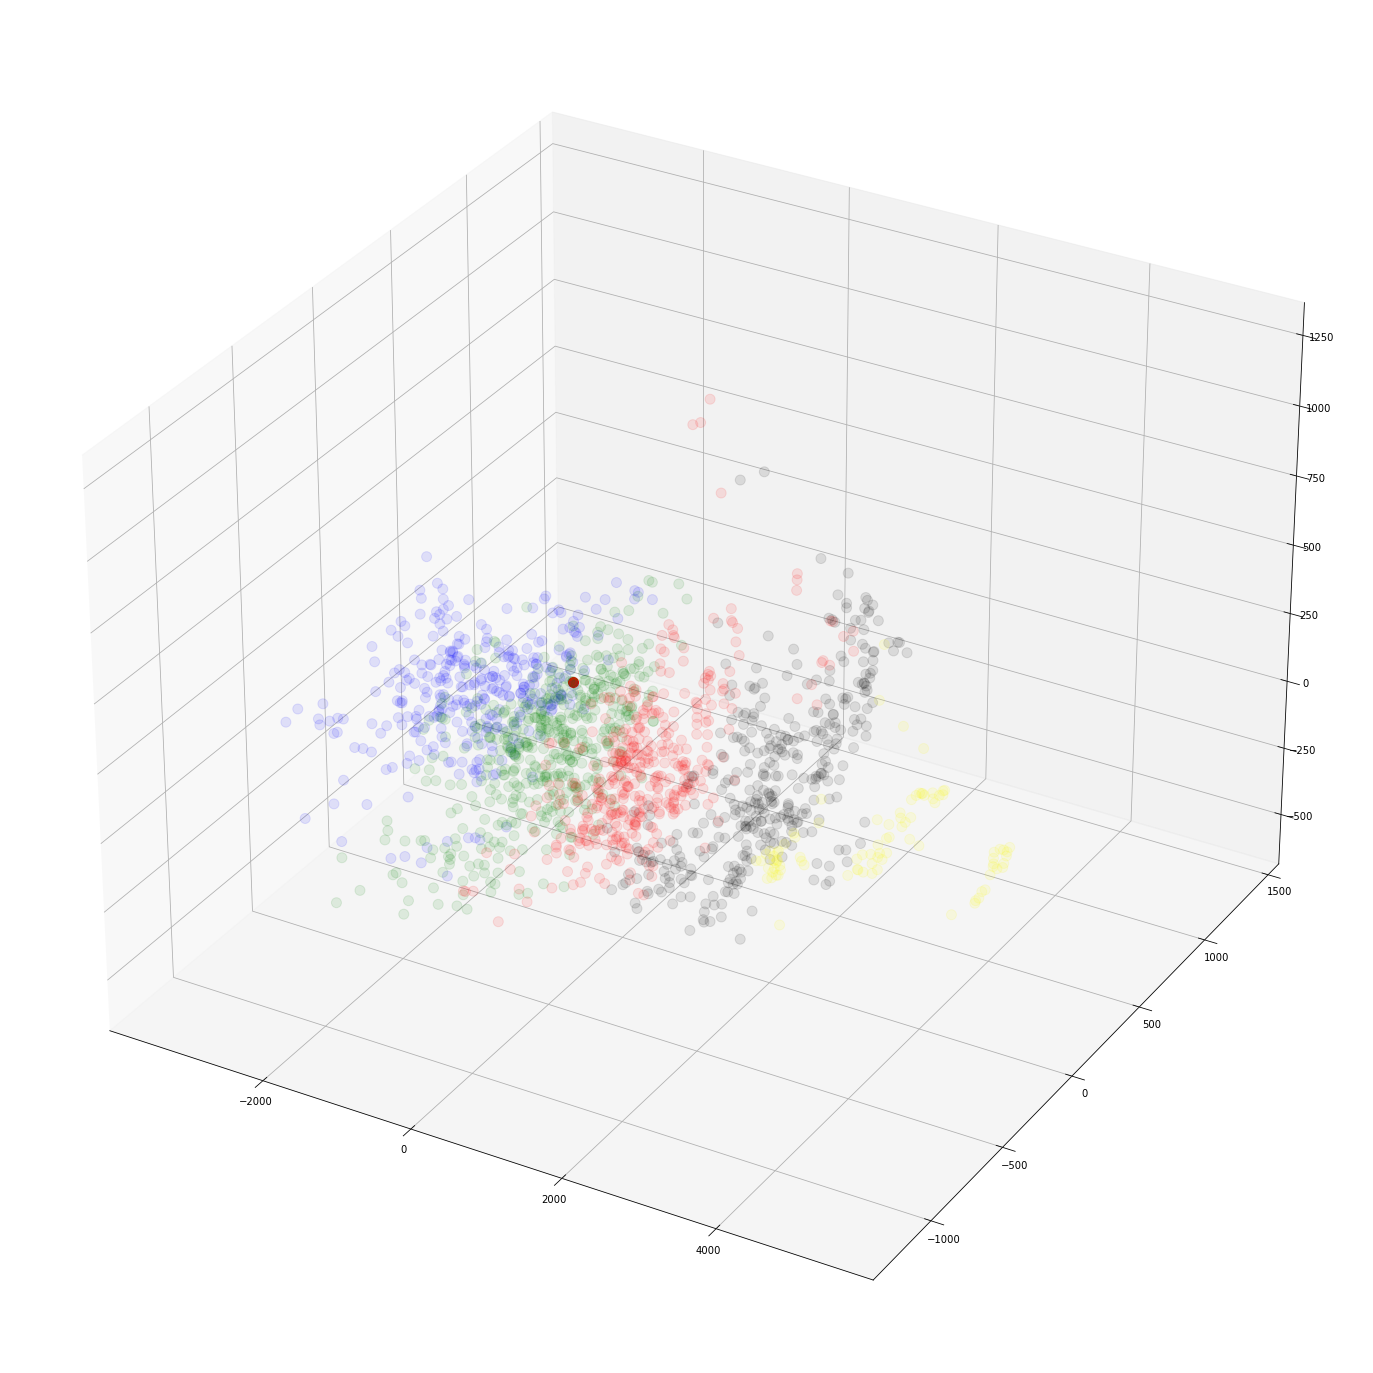

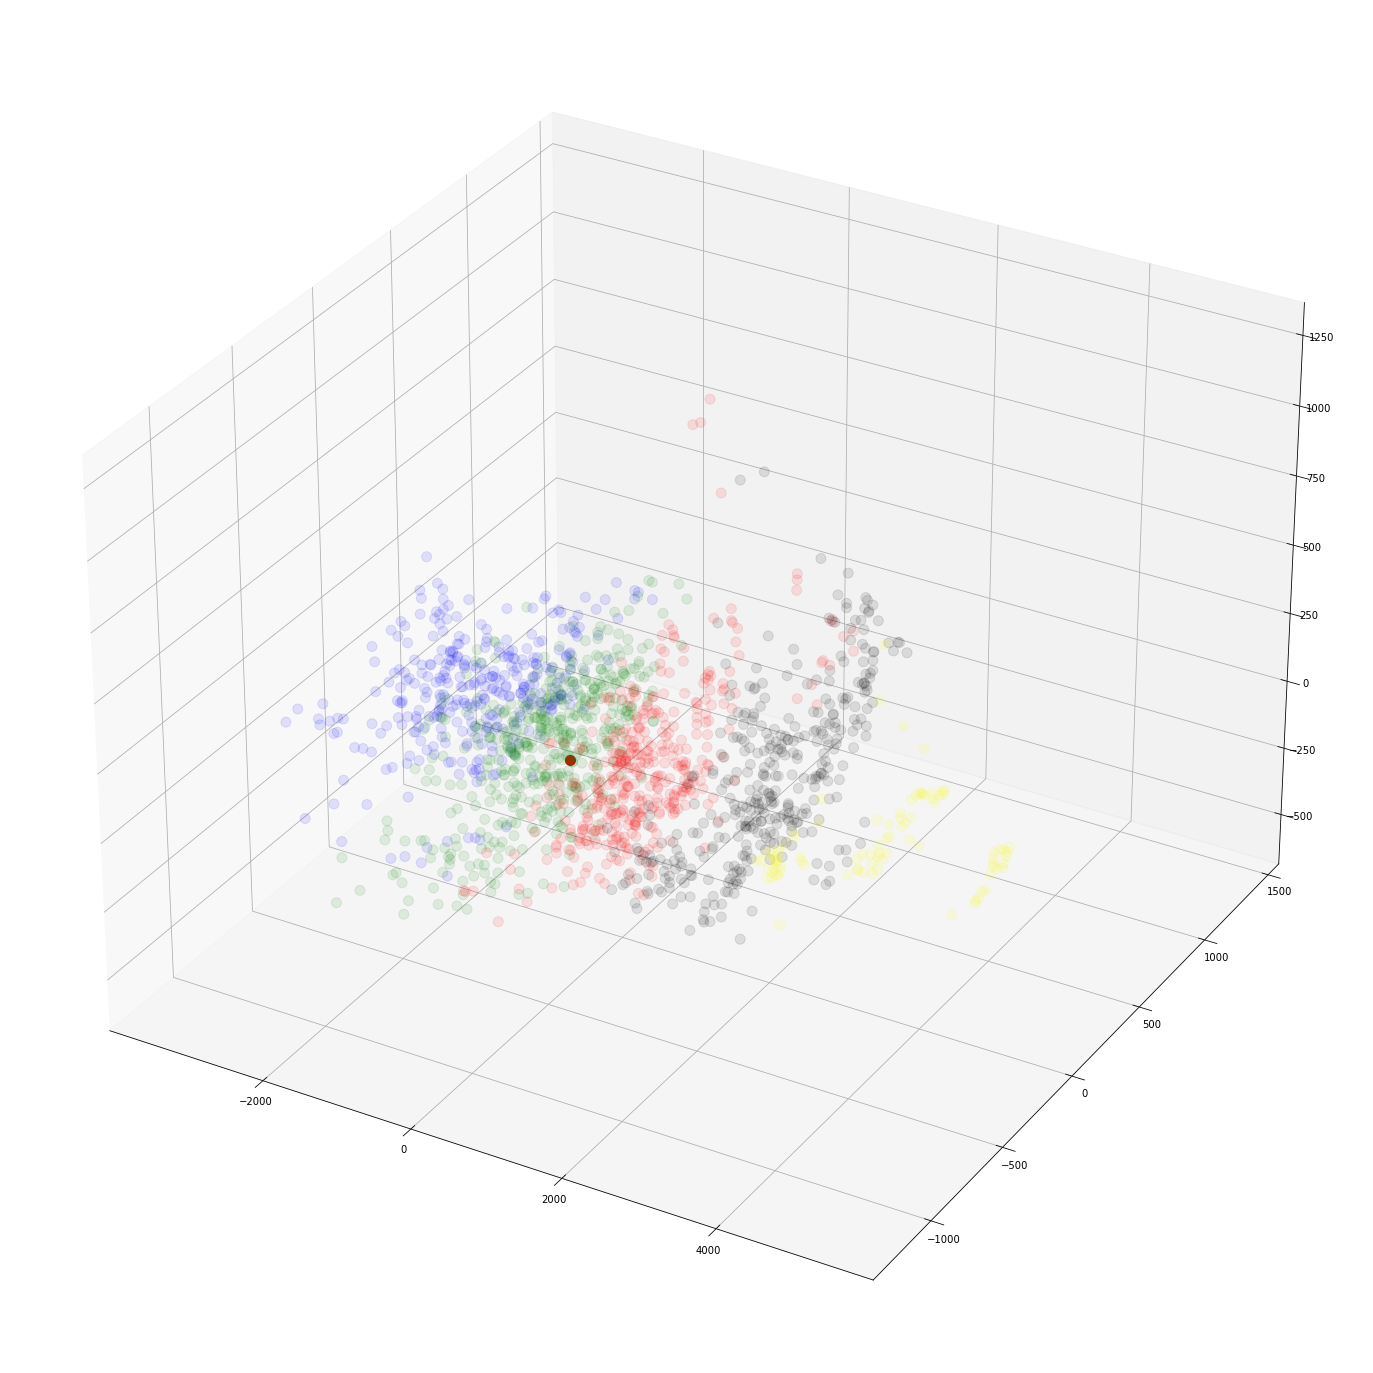

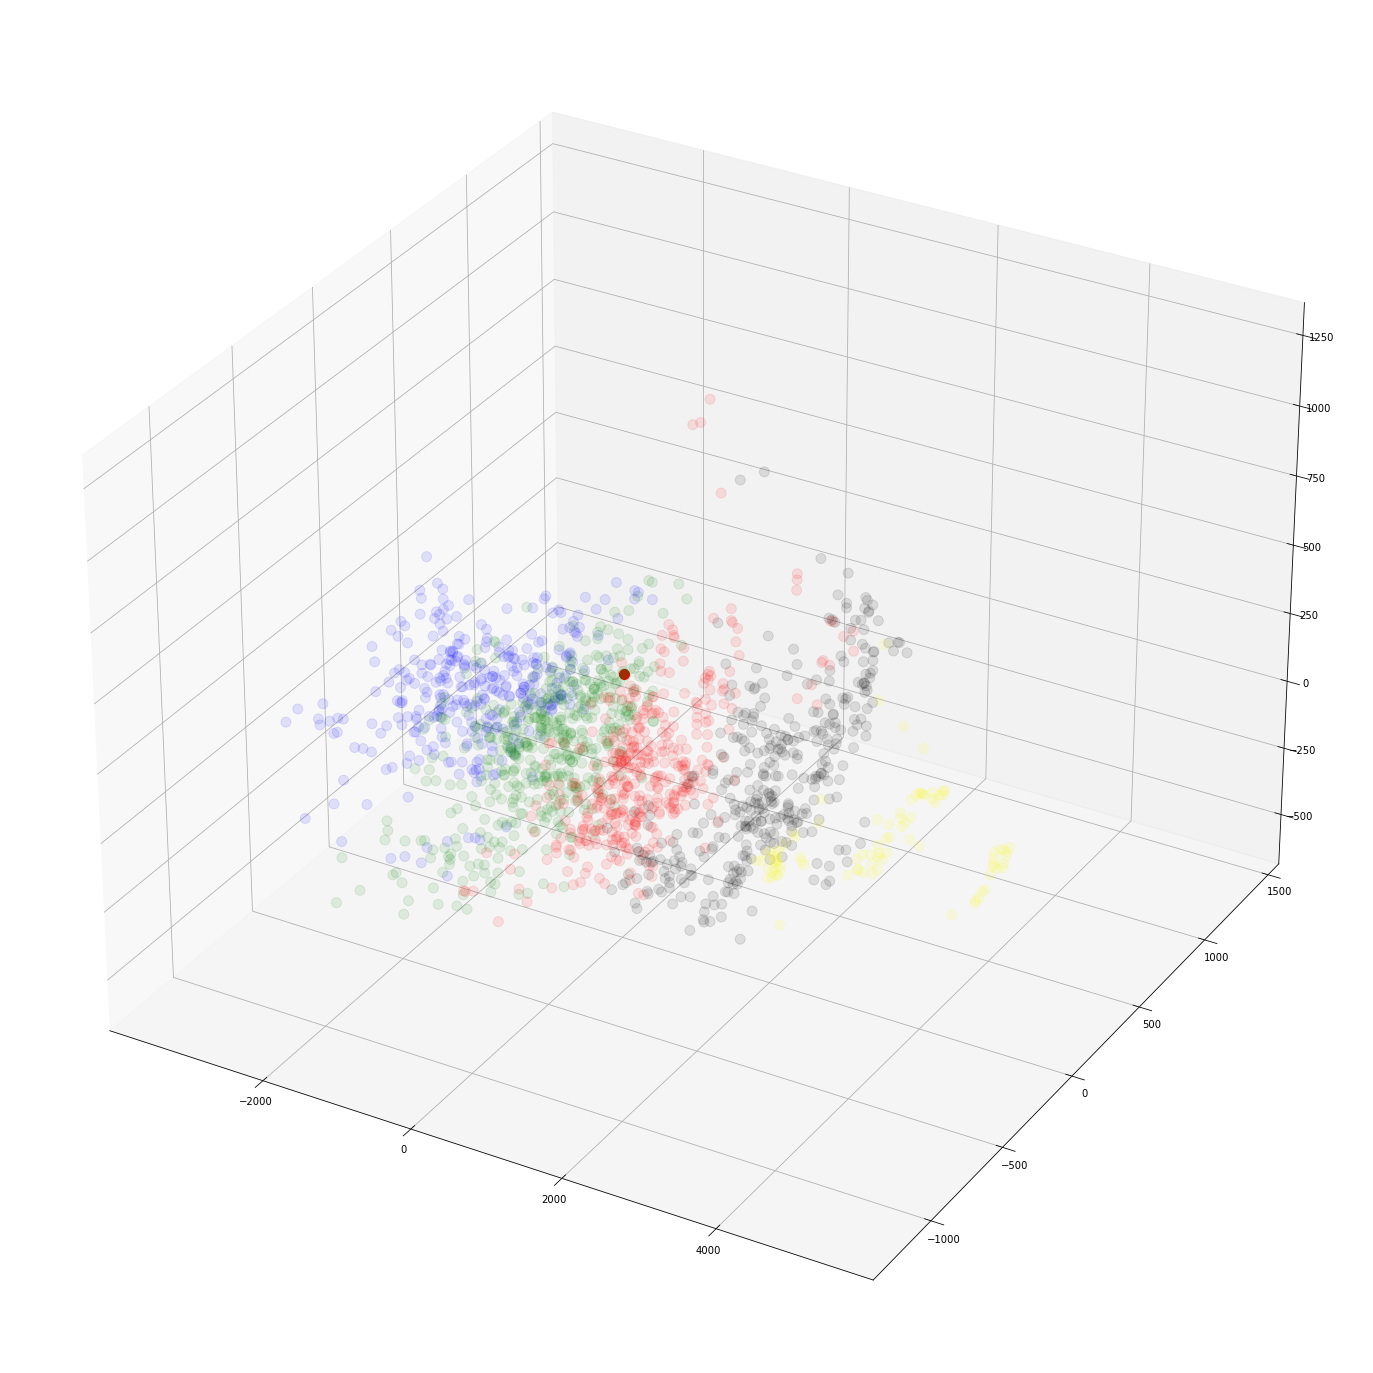

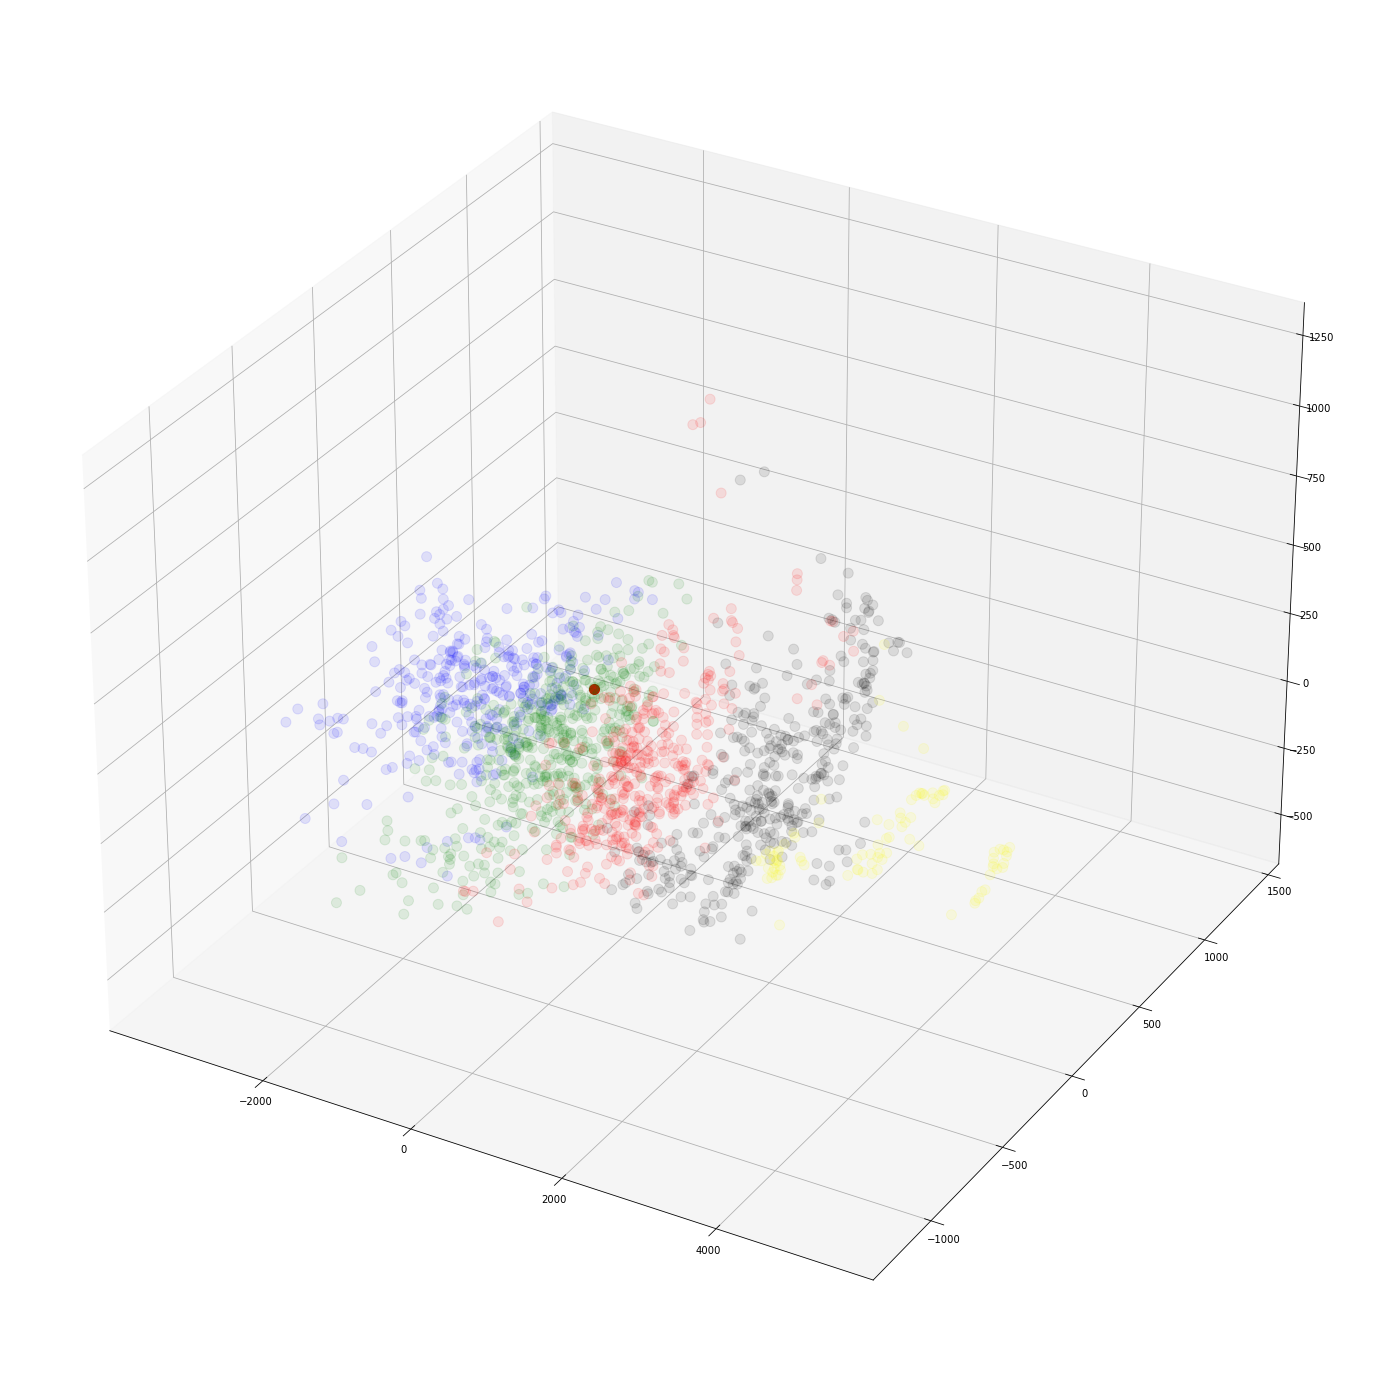

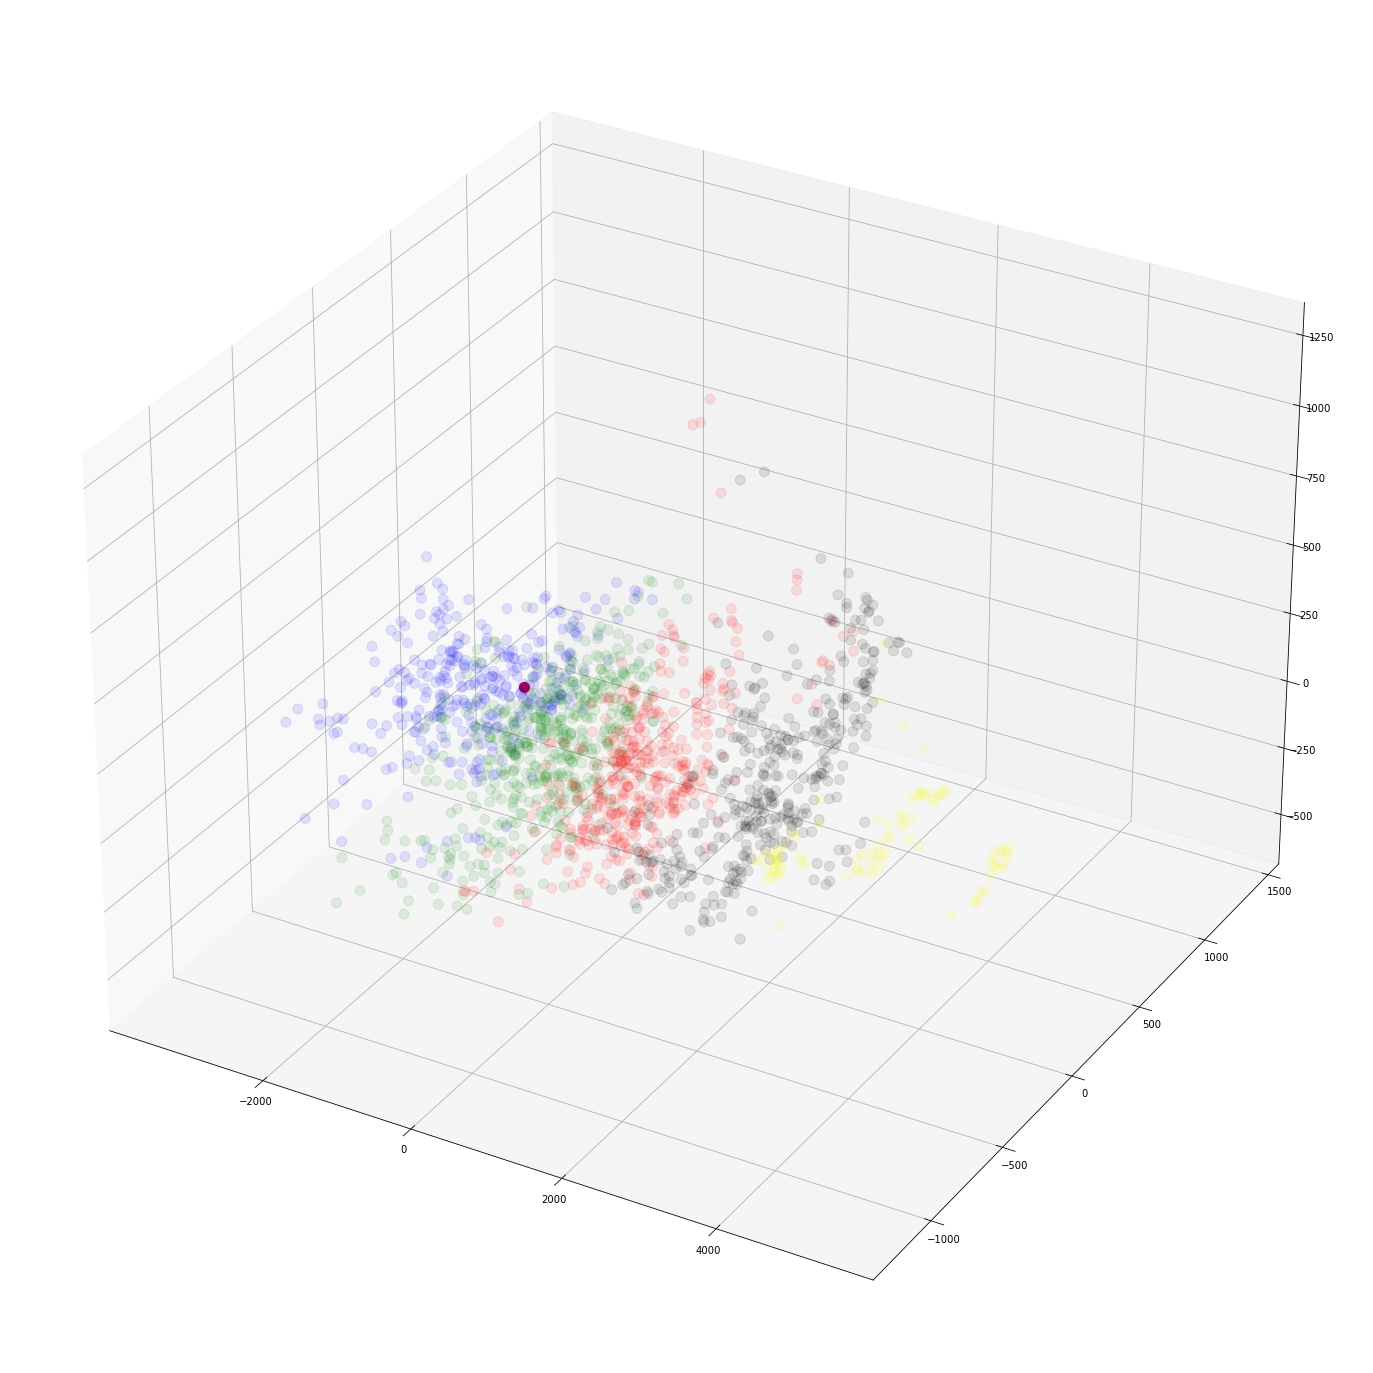

In [116]:
# Check sample data
for i in range(-7,0,1):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    fig.set_size_inches(30,25)

    ax.scatter(X_ALL[:,0], X_ALL[:,1], X_ALL[:,2], c=y_ALL, cmap=colors, alpha=0.1, s=100)
    ax.scatter(X_ALL[i,0], X_ALL[i,1], X_ALL[i,2], c="red", cmap=colors,s=100)

    # handles, labels = scatter.legend_elements(prop="colors")
    # legend = ax.legend(handles, labels, loc="best")



(4) K-sne

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


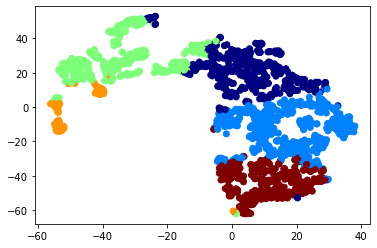

In [25]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_ALL)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_ALL, cmap="jet")

In [27]:
## Check sample data
# for i in range(-8,0,1):
#     print(i)
#     plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_7d, cmap="jet")
#     plt.scatter(X_tsne[i,0], X_tsne[i,1], c="red", cmap="jet")
#     plt.show()

In [ ]:
#  3214110

### No PCA & DBSCAN Clustering

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 5 min__sample



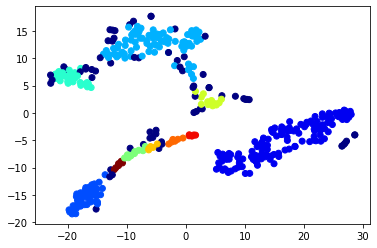

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 10 min__sample



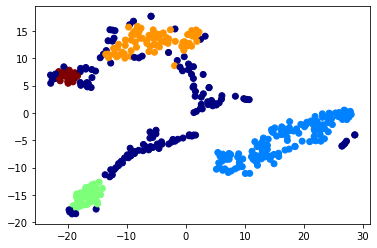

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 15 min__sample



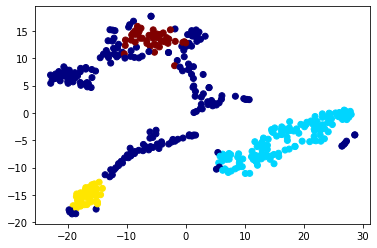

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 20 min__sample



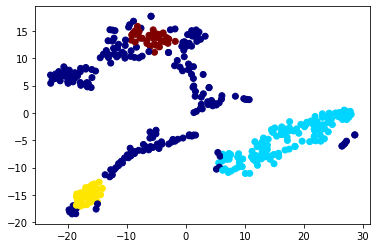

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 25 min__sample



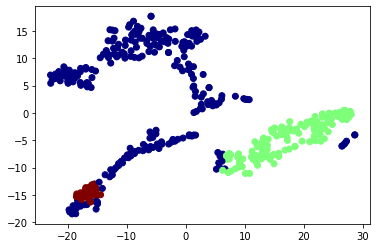

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 5 min__sample



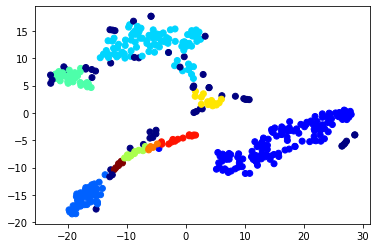

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 10 min__sample



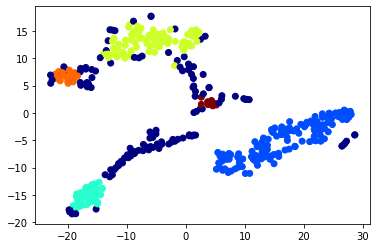

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 15 min__sample



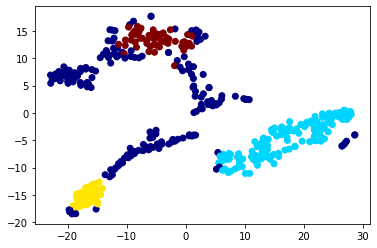

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 20 min__sample



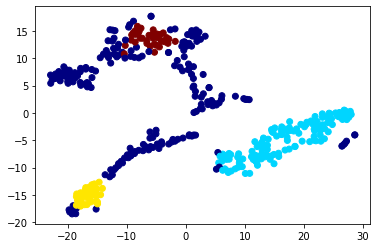

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [3]:
# create model and prediction
for i in range(250,400, 10):
    for k in range(5, 30, 5):
        dbscan = DBSCAN(eps=i,min_samples=k)
        clustering= dbscan.fit(X)
        y_dbscan = dbscan.fit_predict(X)
        y_pred = pd.DataFrame(y_dbscan)
        y_pred.columns=['predict']

        # concatenate labels to df as a new column
        r = pd.concat([X,y_pred],axis=1)

        # print(r)
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X)
        
        print("{i} eps , {k} min__sample".format(i=i,k=k))
        
        print()
        plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
        plt.show()

Find model : 250eps, 10samples

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 25 min__sample


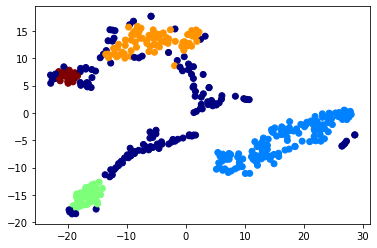

In [4]:
dbscan = DBSCAN(eps=250,min_samples=10)
clustering= dbscan.fit(X)
y_dbscan = dbscan.fit_predict(X)
y_pred = pd.DataFrame(y_dbscan)
y_pred.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([X,y_pred],axis=1)

# print(r)


# TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

print("{i} eps , {k} min__sample".format(i=i,k=k))

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
plt.show()

In [5]:
clustering.labels_

array([ 0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  1,  0,  0,
        0,  2,  2,  2, -1, -1,  3, -1,  3, -1, -1, -1,  2, -1, -1,  2, -1,
       -1, -1, -1, -1,  3,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1, -1, -1,
        1,  1,  0, -1,  1, -1, -1,  3,  3,  3, -1, -1, -1,  0,  0,  0,  0,
        0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3,  3, -1, -1, -1, -1, -1,  2, -1,  2,  2,  0,  0,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  3,  3,
       -1,  3,  2, -1,  3, -1, -1, -1, -1, -1,  2, -1,  1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1,  0, -1,  0, -1,  0,  2,  0,  2,  0,  2,  2,  1,
        1, -1, -1,  1,  1,  1,  2, -1,  2,  0,  1,  0, -1,  0, -1,  0, -1,
        0, -1,  1,  2,  0, -1,  1, -1,  0,  1,  2,  0, -1,  1, -1,  0, -1,
        1,  1, -1,  2, -1,  2,  2, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2,
       -1, -1,  3, -1,  3, -1,  3,  0, -1,  3,  0, -1,  3,  0, -1, -1, -1,
       -1,  0,  2,  0, -1

In [6]:
df = pd.DataFrame(X_tsne, columns=['x_tsne[0]', 'x_tsne[1]'])
df['predict'] = y_dbscan
outlier = np.array(df['predict'] != -1)
outlier

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False,

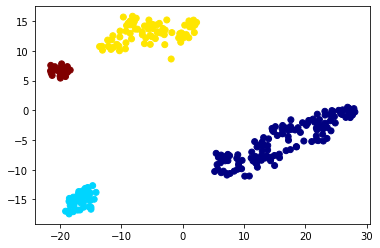

In [7]:
plt.scatter(X_tsne[outlier,0], X_tsne[outlier,1], c=y_dbscan[outlier], cmap="jet")
plt.show()

In [8]:
X['outlier'] = outlier
X.to_csv("./outlier.csv")

C:\Users\uyoung\AppData\Local\Temp\ipykernel_31060\1835983118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['outlier'] = outlier


New data

In [11]:
New = pd.read_csv("./Sample_A.csv")
New = New.iloc[:,1:]  # remove the first three columns

test_X = New.iloc[:,2:-1]  # new data
test_y = New.iloc[:,-1]    # y_label
test_X

B03_Green_  B02_Blue_4  B12_SWIR_2  B11_SWIR_1  B8A_VRE_86  B07_VRE_78  \
0        2492        2219        4360        4926        3935        3857   
1        2717        2390        4945        5525        4214        4083   
2        2383        2105        4217        4775        3815        3636   
3        2630        2323        4751        5296        4080        3885   
4        2976        2600        4185        4973        4838        4740   
5        3129        2686        4765        5800        5086        4889   
6        2353        2284        2788        3030        3079        2949   
7        2275        2212        2614        2877        2855        2901   

   B06_VRE_74  B05_VRE_75  B04_Red_66  
0        3537        3074        2754  
1        3797        3512        3106  
2        3426        2960        2692  
3        3645        3381        3032  
4        4243        3396        3190  
5        4464        3727        3449  
6        2830        2582        2382  
7        2848        2538        2286

In [12]:
test_X

B03_Green_  B02_Blue_4  B12_SWIR_2  B11_SWIR_1  B8A_VRE_86  B07_VRE_78  \
0        2492        2219        4360        4926        3935        3857   
1        2717        2390        4945        5525        4214        4083   
2        2383        2105        4217        4775        3815        3636   
3        2630        2323        4751        5296        4080        3885   
4        2976        2600        4185        4973        4838        4740   
5        3129        2686        4765        5800        5086        4889   
6        2353        2284        2788        3030        3079        2949   
7        2275        2212        2614        2877        2855        2901   

   B06_VRE_74  B05_VRE_75  B04_Red_66  
0        3537        3074        2754  
1        3797        3512        3106  
2        3426        2960        2692  
3        3645        3381        3032  
4        4243        3396        3190  
5        4464        3727        3449  
6        2830        2582        2382  
7        2848        2538        2286

In [13]:
test_y_dbscan = dbscan.fit_predict(test_X)
test_y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Outlier Analysis

In [17]:
pass_ = [not i for i in outlier]
pass_

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 Fa

In [19]:
X

B03_Green_  B02_Blue_4  B12_SWIR_2  B11_SWIR_1  B8A_VRE_86  B07_VRE_78  \
0        3347.0      2870.0      5451.0      6091.0      4945.0      4784.0   
1        3349.0      2889.0      5550.0      6164.0      4983.0      4817.0   
2        3362.0      2901.0      5523.0      6192.0      4961.0      4802.0   
3        3391.0      2877.0      5529.0      6233.0      5021.0      4853.0   
4        2576.0      2266.0      4759.0      5309.0      3849.0      3724.0   
..          ...         ...         ...         ...         ...         ...   
401      3210.0      2744.0      4690.0      5732.0      5316.0      5205.0   
402      3153.0      2727.0      5104.0      6191.0      5043.0      4832.0   
403      2456.0      2194.0      4619.0      5030.0      3775.0      3592.0   
404      3281.0      2825.0      4784.0      5796.0      5489.0      5418.0   
405      2440.0      2167.0      4646.0      5028.0      3704.0      3635.0   

     B06_VRE_74  B05_VRE_75  B04_Red_66  outlier  
0        4556.0      4258.0      3807.0     True  
1        4580.0      4281.0      3838.0     True  
2        4567.0      4278.0      3851.0     True  
3        4601.0      4322.0      3848.0     True  
4        3475.0      3161.0      2913.0     True  
..          ...         ...         ...      ...  
401      4856.0      4143.0      3696.0     True  
402      4571.0      4168.0      3592.0    False  
403      3355.0      3049.0      2787.0     True  
404      4951.0      4230.0      3749.0     True  
405      3298.0      2991.0      2745.0     True  

[406 rows x 10 columns]

In [28]:
Outlier = X[pass_]
Outlier=Outlier.iloc[:,:9]
Outlier

B03_Green_  B02_Blue_4  B12_SWIR_2  B11_SWIR_1  B8A_VRE_86  B07_VRE_78  \
13       3062.0      2701.0      5043.0      5786.0      4608.0      4436.0   
21       2903.0      2520.0      4410.0      5328.0      4900.0      4684.0   
22       3005.0      2595.0      5278.0      5854.0      4454.0      4370.0   
24       2906.0      2523.0      5142.0      5944.0      4475.0      4269.0   
26       2987.0      2580.0      4436.0      5333.0      4805.0      4666.0   
..          ...         ...         ...         ...         ...         ...   
395      3139.0      2593.0      5013.0      6221.0      5276.0      4977.0   
396      2583.0      2270.0      3975.0      5163.0      4582.0      4443.0   
397      3022.0      2573.0      4201.0      5248.0      5632.0      5479.0   
400      3123.0      2685.0      5238.0      6311.0      5064.0      4890.0   
402      3153.0      2727.0      5104.0      6191.0      5043.0      4832.0   

     B06_VRE_74  B05_VRE_75  B04_Red_66  
13       4101.0      3972.0      3396.0  
21       4482.0      3922.0      3371.0  
22       4067.0      3805.0      3456.0  
24       4056.0      3761.0      3405.0  
26       4351.0      3813.0      3412.0  
..          ...         ...         ...  
395      4641.0      4076.0      3579.0  
396      4098.0      3295.0      2766.0  
397      4948.0      3752.0      3254.0  
400      4569.0      4041.0      3528.0  
402      4571.0      4168.0      3592.0  

[143 rows x 9 columns]

#### (1) DBSCAN

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 5 min__sample



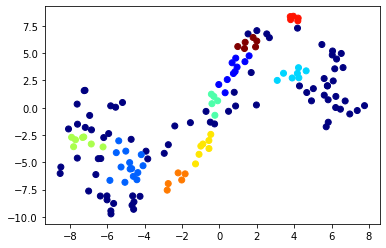

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 10 min__sample



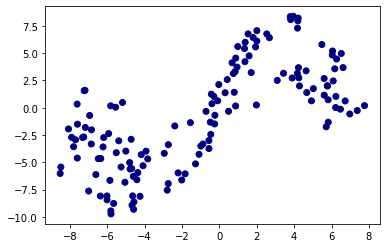

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 15 min__sample



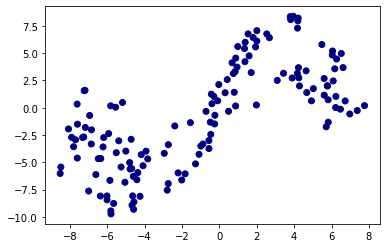

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 20 min__sample



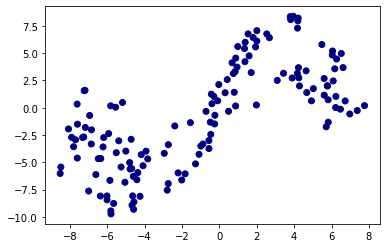

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 25 min__sample



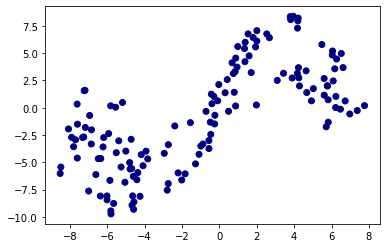

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 5 min__sample



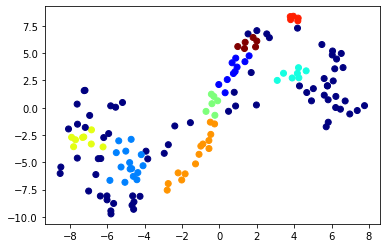

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 10 min__sample



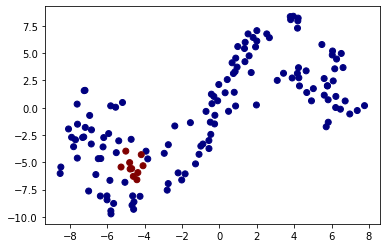

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 15 min__sample



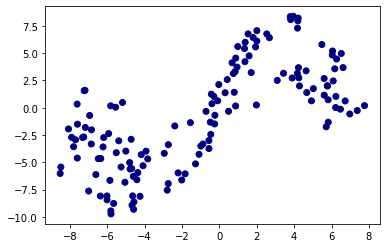

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 20 min__sample



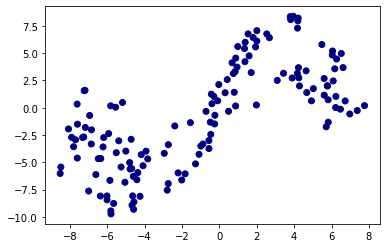

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 25 min__sample



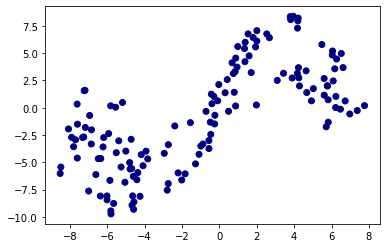

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 5 min__sample



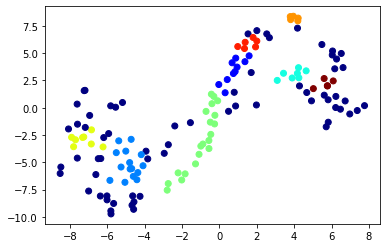

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 10 min__sample



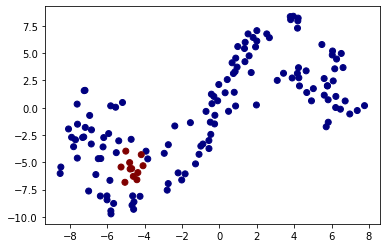

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 15 min__sample



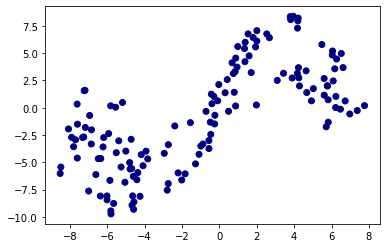

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 20 min__sample



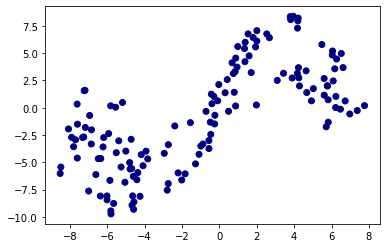

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 25 min__sample



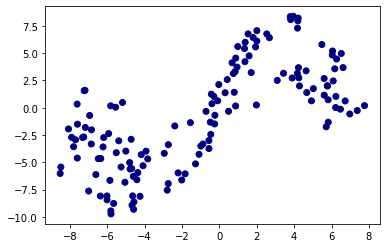

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 5 min__sample



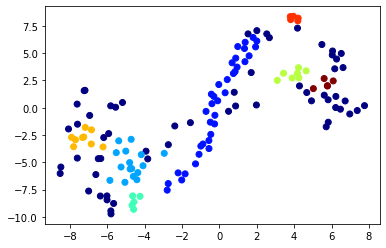

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 10 min__sample



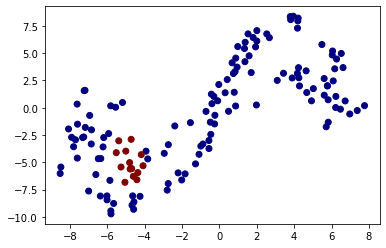

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 15 min__sample



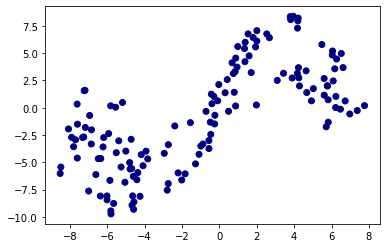

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 20 min__sample



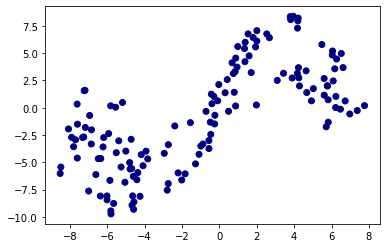

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 25 min__sample



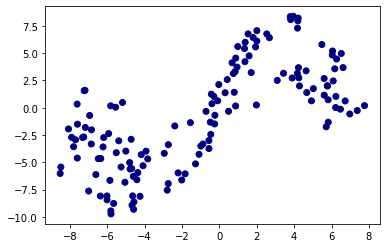

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 5 min__sample



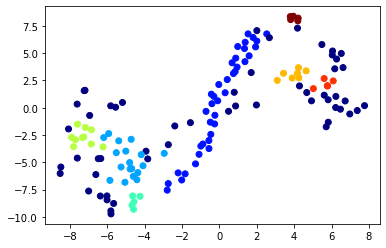

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 10 min__sample



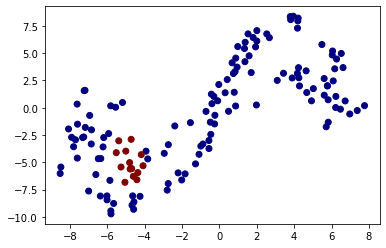

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 15 min__sample



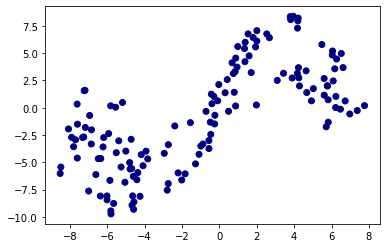

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 20 min__sample



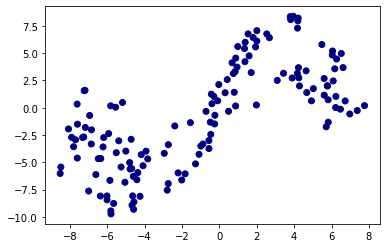

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 25 min__sample



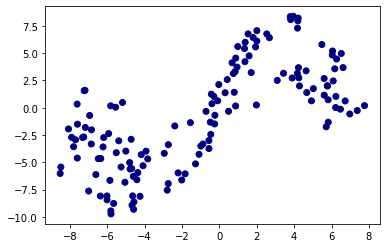

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 5 min__sample



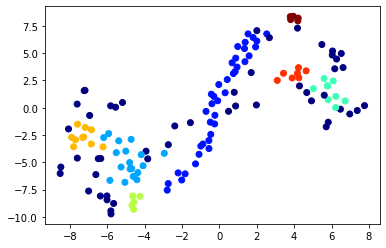

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 10 min__sample



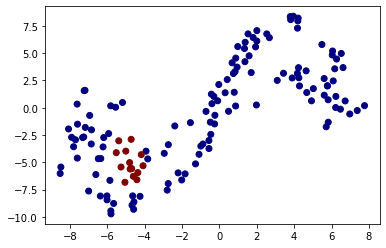

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 15 min__sample



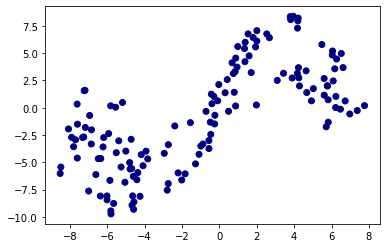

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 20 min__sample



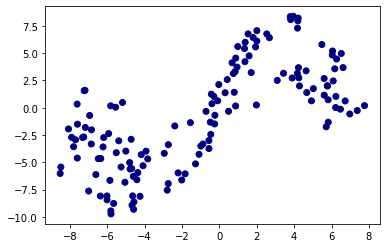

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 25 min__sample



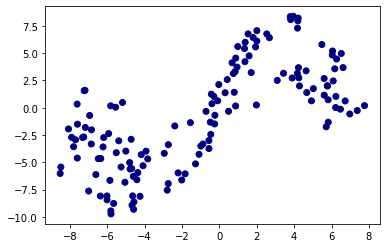

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 5 min__sample



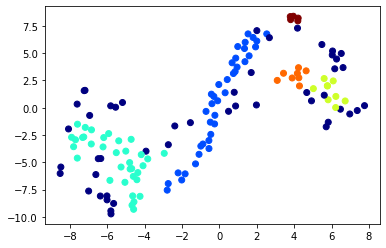

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 10 min__sample



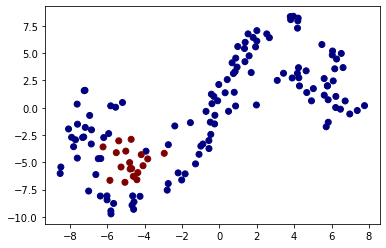

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 15 min__sample



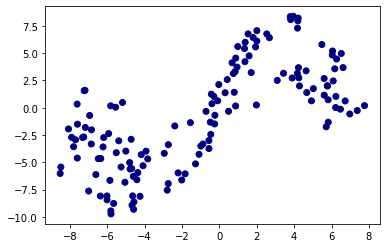

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 20 min__sample



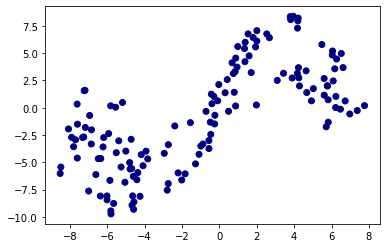

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 25 min__sample



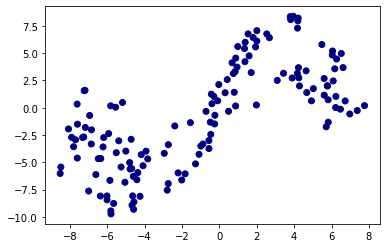

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 5 min__sample



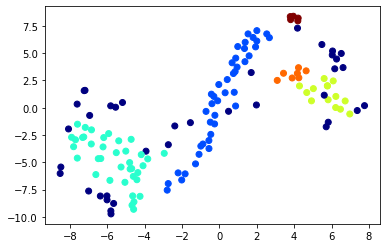

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 10 min__sample



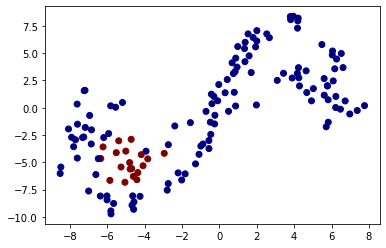

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 15 min__sample



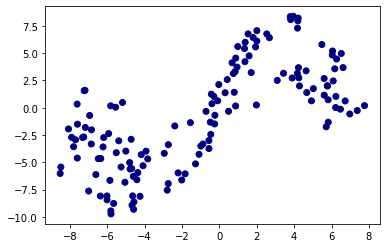

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 20 min__sample



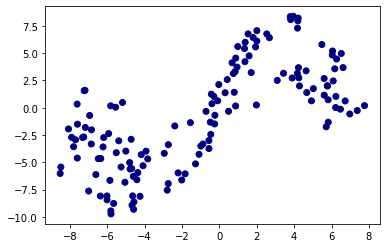

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 25 min__sample



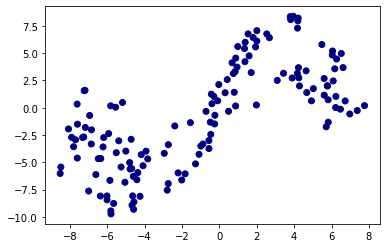

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 5 min__sample



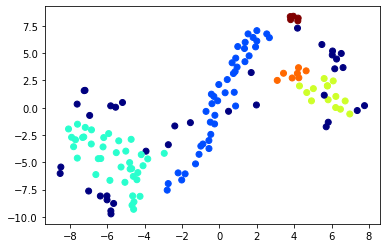

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 10 min__sample



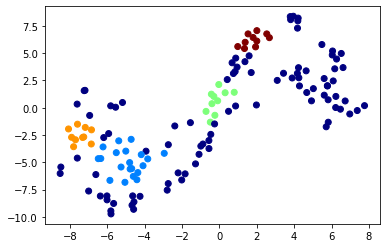

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 15 min__sample



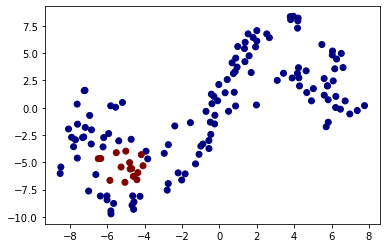

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 20 min__sample



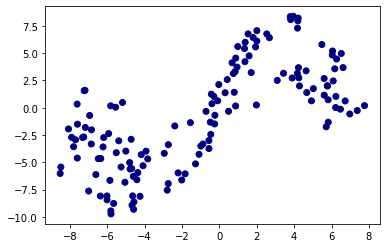

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 25 min__sample



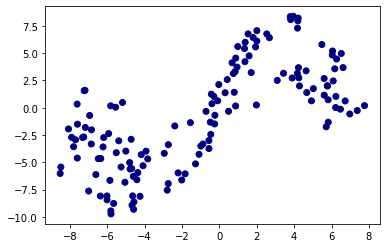

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 5 min__sample



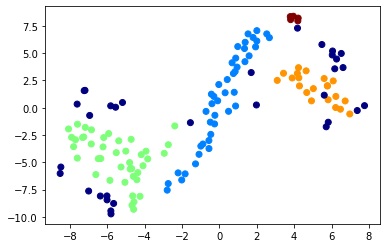

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 10 min__sample



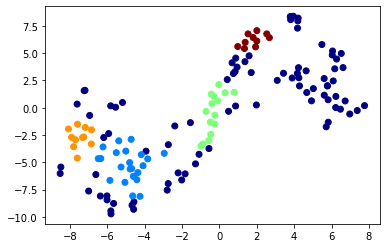

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 15 min__sample



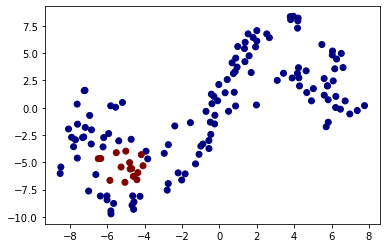

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 20 min__sample



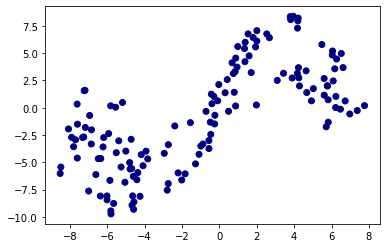

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 25 min__sample



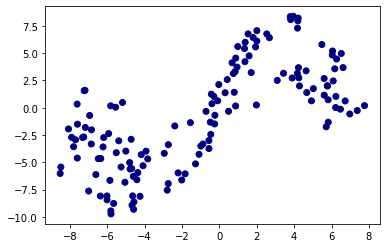

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 5 min__sample



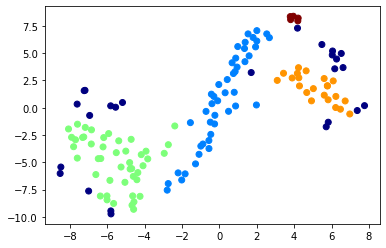

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 10 min__sample



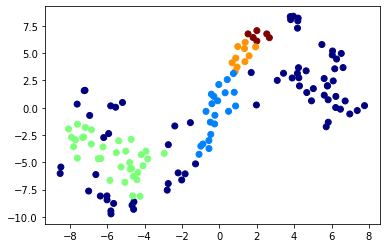

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 15 min__sample



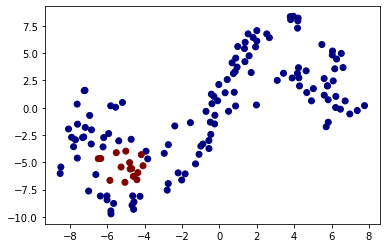

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 20 min__sample



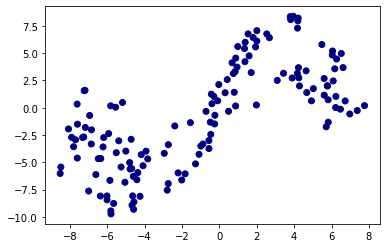

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 25 min__sample



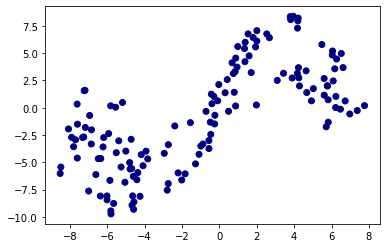

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 5 min__sample



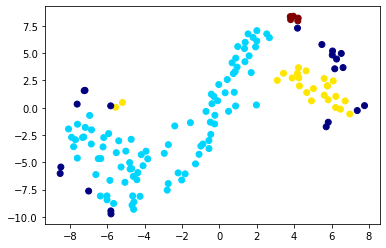

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 10 min__sample



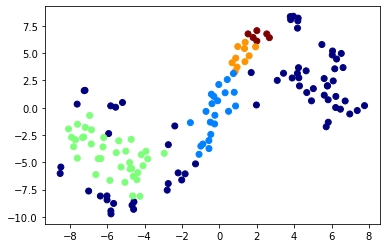

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 15 min__sample



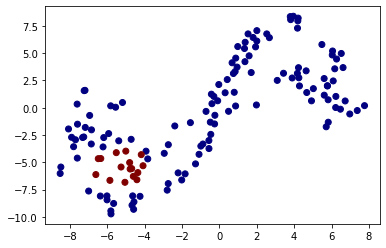

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 20 min__sample



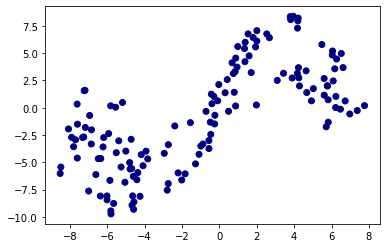

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 25 min__sample



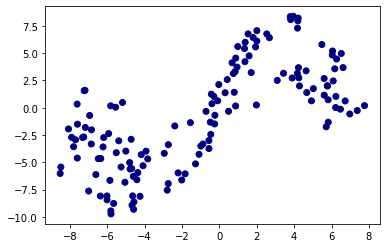

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 5 min__sample



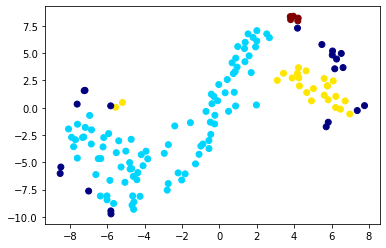

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 10 min__sample



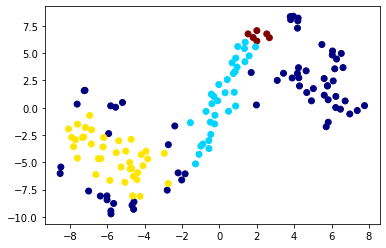

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 15 min__sample



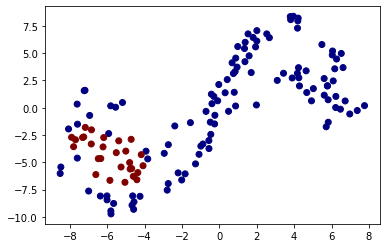

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 20 min__sample



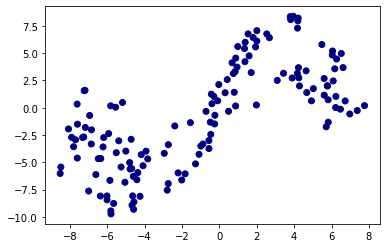

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 25 min__sample



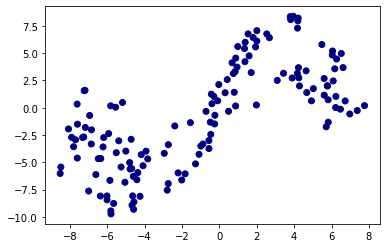

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 5 min__sample



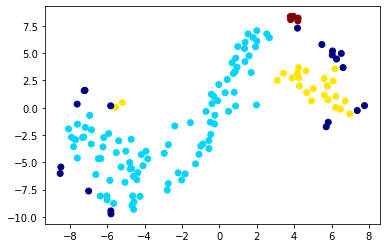

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 10 min__sample



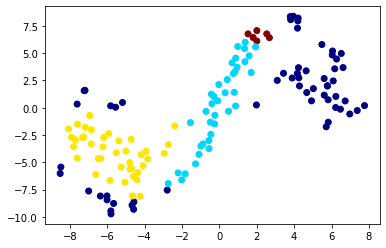

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 15 min__sample



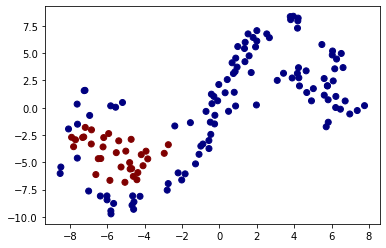

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 20 min__sample



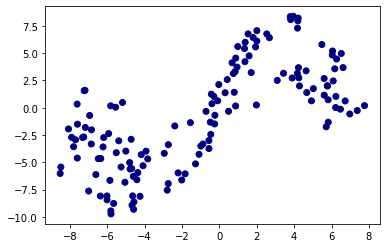

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 25 min__sample



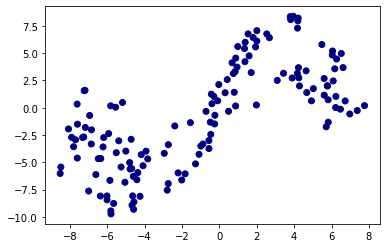

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 5 min__sample



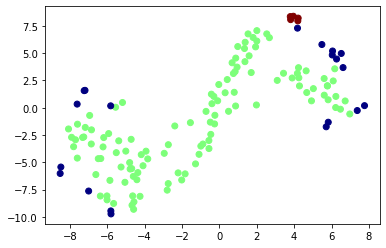

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 10 min__sample



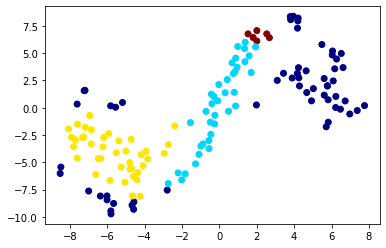

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 15 min__sample



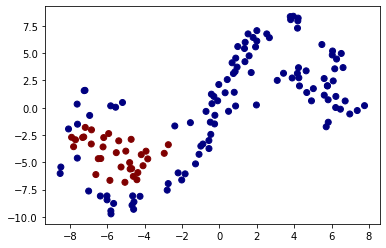

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 20 min__sample



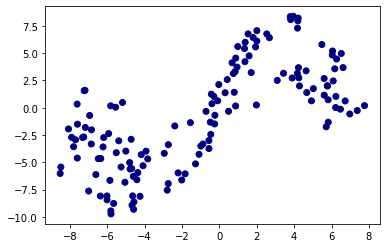

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 25 min__sample



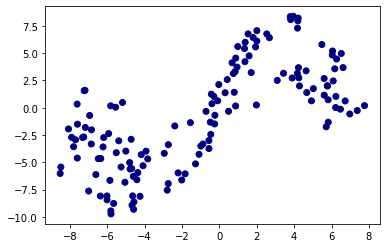

In [29]:
# create model and prediction
for i in range(250,400, 10):
    for k in range(5, 30, 5):
        dbscan = DBSCAN(eps=i,min_samples=k)
        clustering= dbscan.fit(Outlier)
        y_dbscan = dbscan.fit_predict(Outlier)
        y_pred = pd.DataFrame(y_dbscan)
        y_pred.columns=['predict']

        # concatenate labels to df as a new column
        r = pd.concat([Outlier,y_pred],axis=1)

        # print(r)
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(Outlier)
        
        print("{i} eps , {k} min__sample".format(i=i,k=k))
        
        print()
        plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
        plt.show()

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


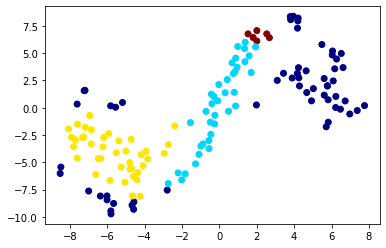

In [30]:
dbscan = DBSCAN(eps=390,min_samples=10)
clustering= dbscan.fit(Outlier)
y_dbscan = dbscan.fit_predict(Outlier)
y_pred = pd.DataFrame(y_dbscan)
y_pred.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([Outlier,y_pred],axis=1)

# print(r)


# TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Outlier)


plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
plt.show()

#### (2) K-means clustering

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


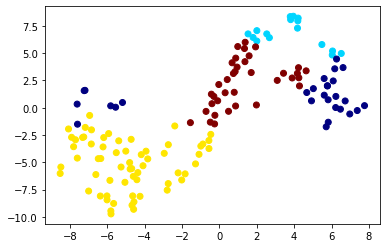

In [31]:
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(Outlier)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Outlier)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred, cmap="jet")